In [ ]:
# pip install pdfplumber
# !pip install pdf2image
# import sys
# !{sys.executable} -m pip install pytesseract pdf2image

In [2]:
import pytesseract
from pdf2image import convert_from_path
import os

# --- PATHS ---
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
poppler_bin_path = r'C:\poppler\poppler-25.12.0\Library\bin' 
input_file = r'C:\pdf2csv\5264_tabular.pdf'

try:
    print("1. Converting PDF to Image...")
    images = convert_from_path(input_file, first_page=1, last_page=1, poppler_path=poppler_bin_path)
    
    print("2. Engine Found! Running OCR...")
    text = pytesseract.image_to_string(images[0])
    
    print("\n--- SUCCESS! DATA FOUND ---")
    print(text[:500]) # Previewing the first 500 characters
    
except Exception as e:
    print(f"\nError: {e}")
    print("If you still see 'not installed', check if the path is actually C:\\Program Files (x86)\\Tesseract-OCR")

1. Converting PDF to Image...
2. Engine Found! Running OCR...

--- SUCCESS! DATA FOUND ---
"EVERBANK REVERSE MORTGAGE LLC’ 12/9/2005 | 12/22/2005 7/11/2018 65 1|'Terminated' 5,84 5.95 1.5|'N" oe Tv ‘iy’ 312895 184920. 95, 0) "10573 "02"
"EVERBANK REVERSE MORTGAGE LLC' 1/10/2006 2/8/2006 79 1| ‘Assigned 5.87 5.87 1.5] 'R' Mt T ‘y' 362790 264794. 84 0| "10604 "04"
‘WELLS FARGO BANK NA‘ 12/15/2005 1/24/2006 6/28/2016 WT 1| ‘Terminated’ 5.85 5.95 1.5|'N" Mt Tv ‘iy’ 312895 225284. 4 0) "11434 "02"
"FINANCIAL FREEDOM SENIOR FUNDING CORP" 11/18/2005 | _ 2/16/2006 | __ 8/28/2008, 15 80 2|'Ter


In [15]:
import re
import pandas as pd

# This is the raw text snippet you just got from the OCR
raw_ocr_data = """
"EVERBANK REVERSE MORTGAGE LLC’ 12/9/2005 | 12/22/2005 7/11/2018 65 1|'Terminated' 5,84 5.95 1.5|'N" oe Tv ‘iy’ 312895 184920. 95, 0) "10573 "02"
"EVERBANK REVERSE MORTGAGE LLC' 1/10/2006 2/8/2006 79 1| ‘Assigned 5.87 5.87 1.5] 'R' Mt T ‘y' 362790 264794. 84 0| "10604 "04"
‘WELLS FARGO BANK NA‘ 12/15/2005 1/24/2006 6/28/2016 WT 1| ‘Terminated’ 5.85 5.95 1.5|'N" Mt Tv ‘iy’ 312895 225284. 4 0) "11434 "02"
"""

def parse_mortgage_line(line):
    # This regex looks for: Lender (Text), then Dates (XX/XX/XXXX), then Status (Word)
    # We clean the line first to remove weird OCR artifacts
    clean_line = line.replace("’", "'").replace("‘", "'").replace("|", " ")
    
    # Simple split by whitespace for now to see how the columns align
    parts = clean_line.split()
    
    return parts

# Process the lines
rows = []
for line in raw_ocr_data.strip().split('\n'):
    extracted_row = parse_mortgage_line(line)
    rows.append(extracted_row)

# Create a temporary DataFrame to view
df = pd.DataFrame(rows)
print("--- Extracted Columns Preview ---")
df.head()

--- Extracted Columns Preview ---


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,"""EVERBANK",REVERSE,MORTGAGE,LLC',12/9/2005,12/22/2005,7/11/2018,65,1,'Terminated',...,"'N""",oe,Tv,'iy',312895,184920.,"95,",0),"""10573","""02"""
1,"""EVERBANK",REVERSE,MORTGAGE,LLC',1/10/2006,2/8/2006,79,1,'Assigned,5.87,...,Mt,T,'y',362790,264794.,84,0,"""10604","""04""",None
2,'WELLS,FARGO,BANK,NA',12/15/2005,1/24/2006,6/28/2016,WT,1,'Terminated',...,"'N""",Mt,Tv,'iy',312895,225284.,4,0),"""11434","""02"""


In [16]:
import pytesseract
from pdf2image import convert_from_path
import pandas as pd

# Paths (Keep using the ones that worked for you)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
poppler_bin_path = r'C:\poppler\poppler-25.12.0\Library\bin' 
input_file = r'C:\pdf2csv\5264_tabular.pdf'

def get_rows_from_pdf(pdf_path):
    # 1. Convert to Image
    images = convert_from_path(pdf_path, poppler_path=poppler_bin_path)
    
    all_data = []
    
    for img in images:
        # 2. Run OCR
        raw_text = pytesseract.image_to_string(img)
        
        # 3. Split text into lines
        lines = raw_text.split('\n')
        
        for line in lines:
            # Clean up the OCR 'noise'
            clean_line = line.replace("’", "'").replace("‘", "'").replace("|", " ").strip()
            
            # Skip empty lines or headers (lines that don't have numbers/dates)
            if len(clean_line) < 20: 
                continue
                
            # Split the line into columns based on spaces
            columns = clean_line.split()
            all_data.append(columns)
            
    return all_data

# Execute
print("Reading PDF and extracting rows...")
extracted_rows = get_rows_from_pdf(input_file)

# Show results
print(f"Total rows found: {len(extracted_rows)}")
for i, row in enumerate(extracted_rows[:3]):
    print(f"Row {i+1}: {row}")

Reading PDF and extracting rows...
Total rows found: 66
Row 1: ['"EVERBANK', 'REVERSE', 'MORTGAGE', "LLC'", '12/9/2005', '12/22/2005', '7/11/2018', '65', '1', "'Terminated'", '5,84', '5.95', '1.5', '\'N"', 'oe', 'Tv', "'iy'", '312895', '184920.', '95,', '0)', '"10573', '"02"']
Row 2: ['"EVERBANK', 'REVERSE', 'MORTGAGE', "LLC'", '1/10/2006', '2/8/2006', '79', '1', "'Assigned", '5.87', '5.87', '1.5]', "'R'", 'Mt', 'T', "'y'", '362790', '264794.', '84', '0', '"10604', '"04"']
Row 3: ["'WELLS", 'FARGO', 'BANK', "NA'", '12/15/2005', '1/24/2006', '6/28/2016', 'WT', '1', "'Terminated'", '5.85', '5.95', '1.5', '\'N"', 'Mt', 'Tv', "'iy'", '312895', '225284.', '4', '0)', '"11434', '"02"']


In [1]:
import pytesseract
from pdf2image import convert_from_path
import pandas as pd
import os

# --- SETTINGS ---
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
poppler_path = r'C:\poppler\poppler-25.12.0\Library\bin'
input_file = r'C:\pdf2csv\5264_tabular.pdf'

def process_to_excel(pdf_path):
    # 1. Convert PDF to Image
    images = convert_from_path(pdf_path, poppler_path=poppler_path)
    
    all_rows = []
    
    for page_num, img in enumerate(images):
        raw_text = pytesseract.image_to_string(img)
        lines = raw_text.split('\n')
        
        for row_idx, line in enumerate(lines):
            clean_line = line.replace("’", "'").replace("‘", "'").replace("|", " ").strip()
            
            # Skip empty or very short lines
            if len(clean_line) < 10:
                continue
            
            # Split line into parts
            parts = clean_line.split()
            
            # Create a dictionary for the row including metadata
            row_data = {
                "Source_File": os.path.basename(pdf_path),
                "Row_Number": row_idx + 1,
                "Raw_Content": clean_line, # We keep the full line in one column for now
                "Split_Data": parts         # This shows how the columns are being broken up
            }
            all_rows.append(row_data)

    # 2. Create DataFrame
    df = pd.DataFrame(all_rows)
    
    # 3. Save to Excel with the same name
    output_name = pdf_path.replace(".pdf", ".xlsx")
    df.to_excel(output_name, index=False)
    print(f"Done! Created: {output_name}")

# Run it
process_to_excel(input_file)

Done! Created: C:\pdf2csv\5264_tabular.xlsx


---

--- Processing Page 1 ---


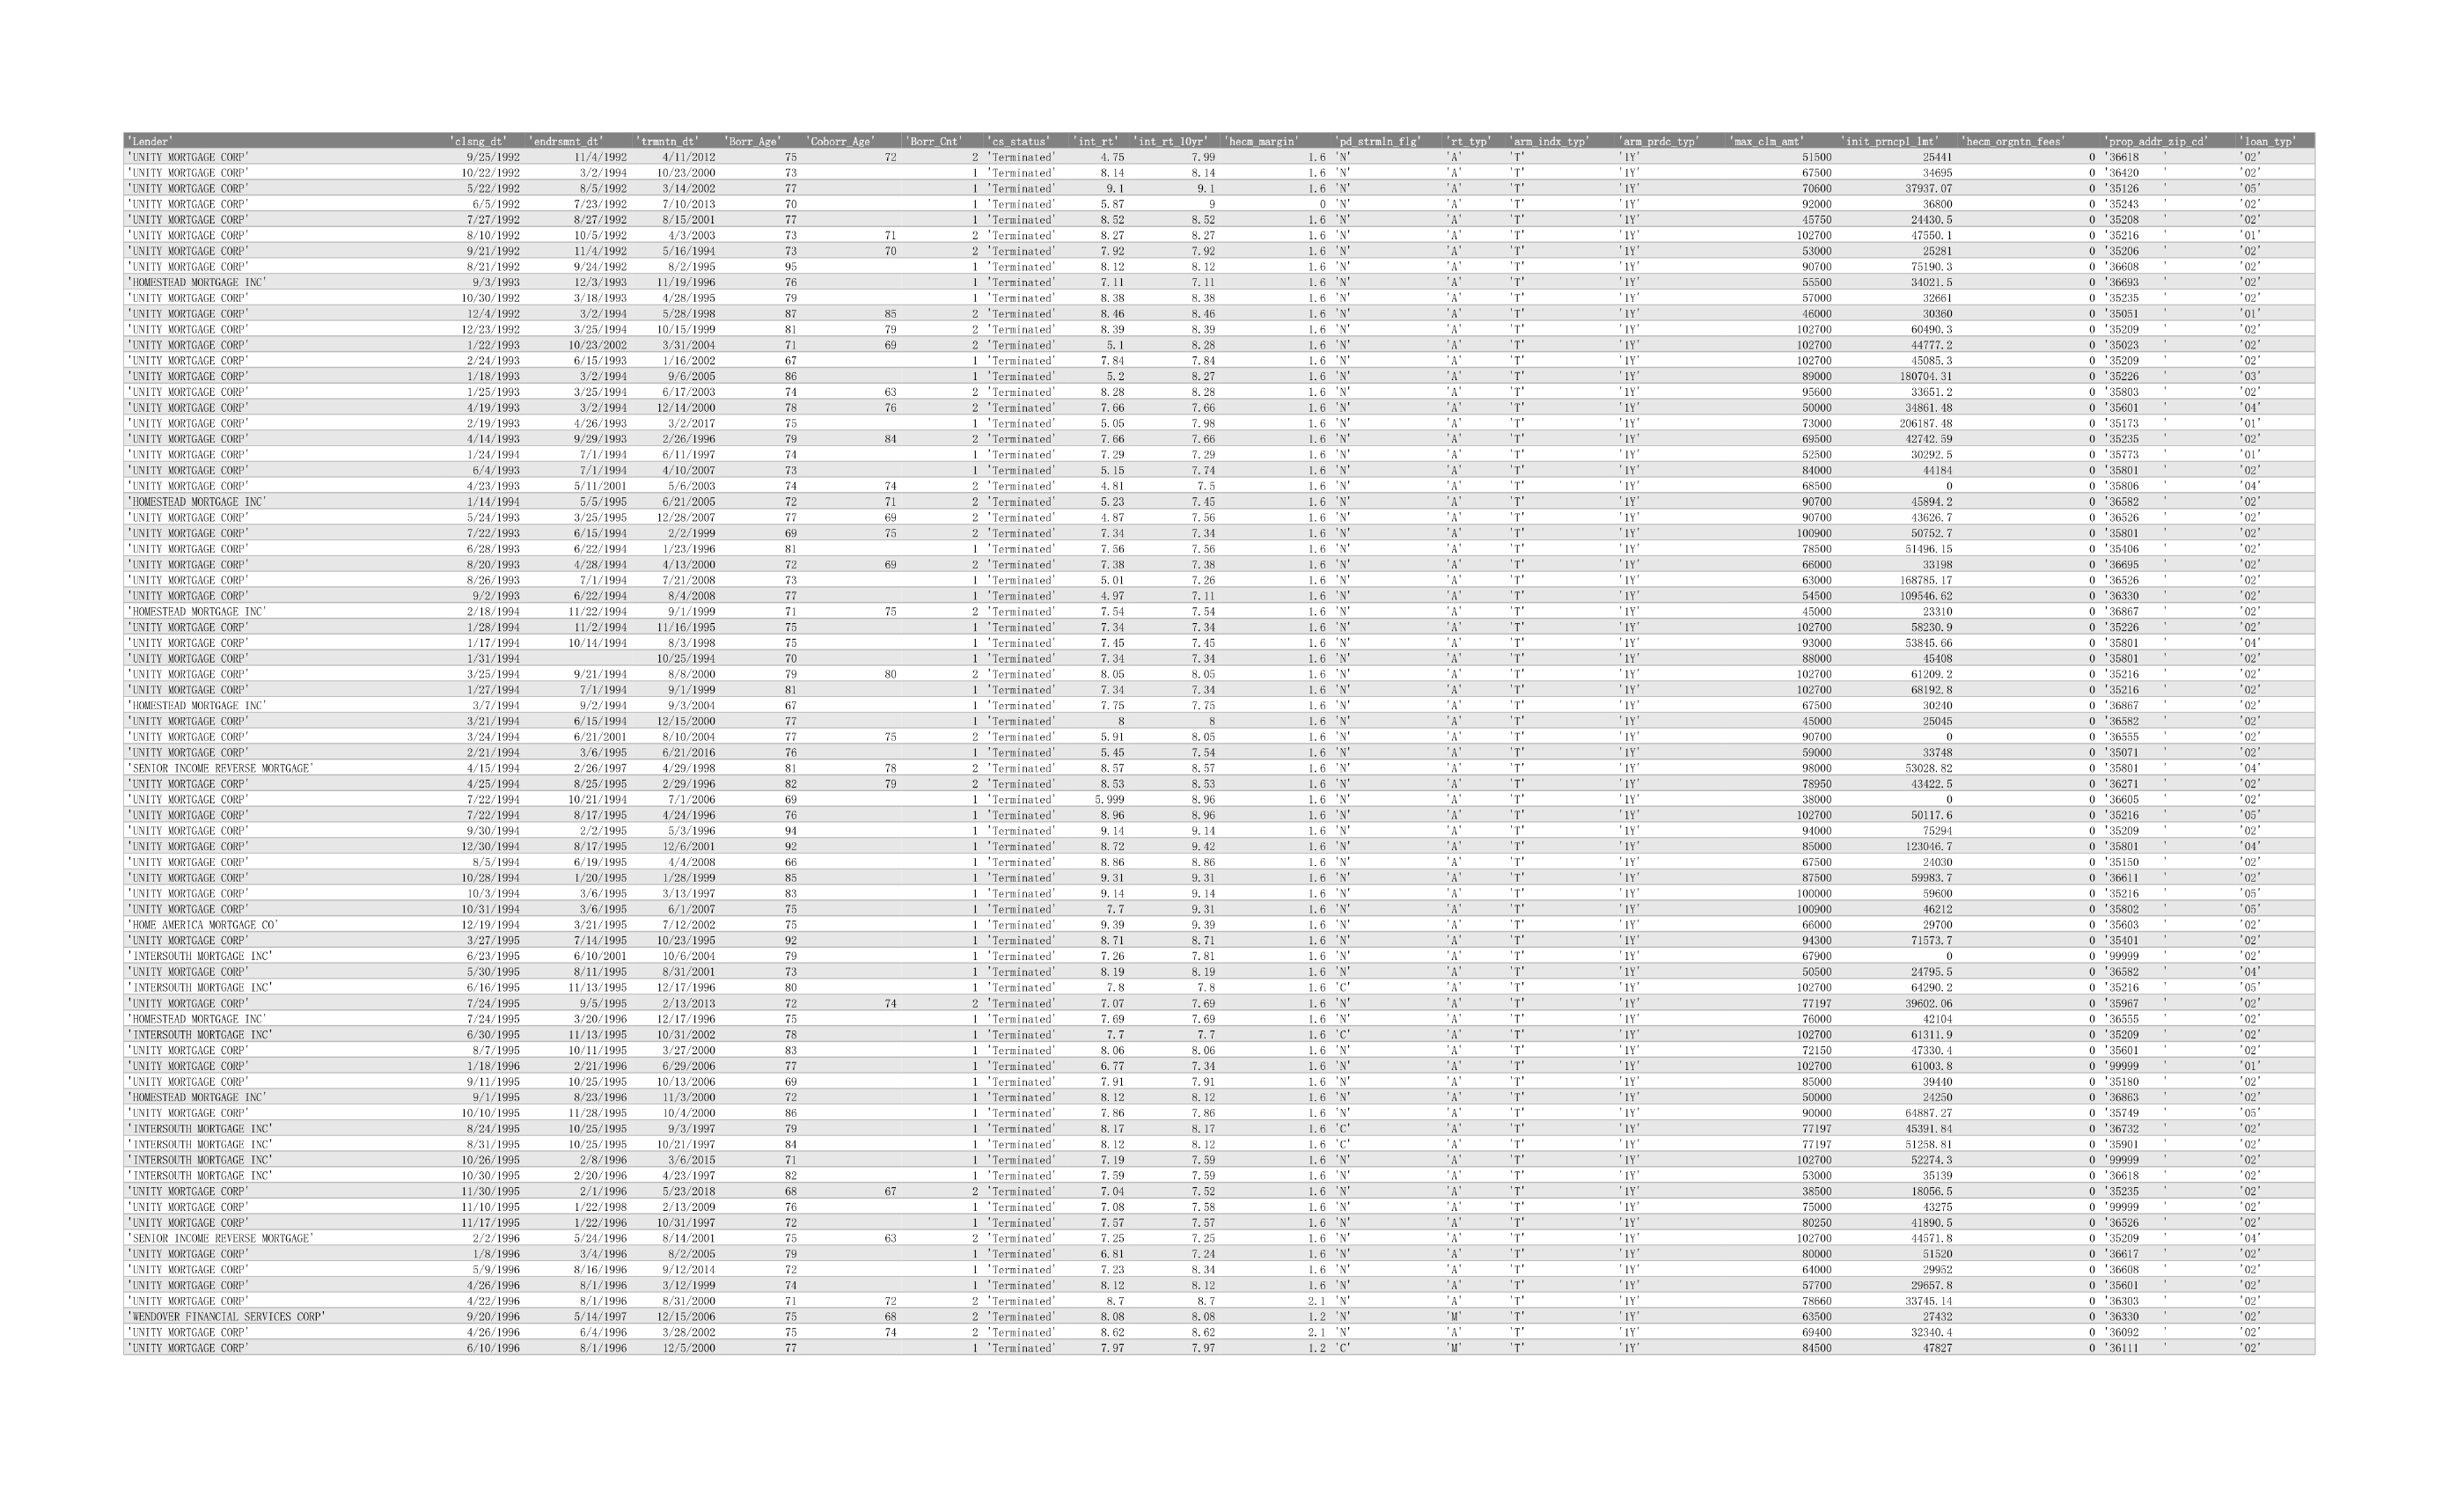

Extracted Text from Page 1:
UNITY MORTGAGE CORP’ 9/25/1992 4/1992, 4/11/2012 5 72 ferminated 7.99 16 51500 25441 0

TUNITY MORTGAGE CORP" 10/22/1992 3/2/1994 10/23/2000 13 “Terminated’ 8.14 1.6 'N' 67500 34695 036420
TUNITY MORTGAGE. CORP” 5/22/1992 8/5/1992 3/14/2002 i "Terminated’ I 91 1.6 'N’ 70600 37937. 07 0 135126
"UNITY MORTGAGE CORP" 6/5/1992 7/23/1992 1/10/2013 70 "Terminated 5.87 9 oN’ 92000 36800 035243
“UNITY MORTGAGE CORP" 7/21/1992 8/27/1992 8/15/2001 it "Terminated’ 8.52 8.52 16 'N’ 45750 24430. 5 0 "35208
TUNITY MORTGAGE CORP" 8/10/1992 10/5/1992 4/3/2003 73 a “Terminated’ 8.27 8.27 1.6 'N' 102700 47550.1 0 "35216
“UNITY MORTGAGE CORP” 9/21/1992 11/4/1992 5/16/1994 23 70 "Terminated" 7.92 7.92 16 'N’ 53000 25281 0 "35206
"UNITY MORTGAGE CORP" 8/21/1992 9/24/1992 8/2/1995 95 "Terminated 8.12 8.12 1.6 'N go700 75190.3 036608
"HOMESTEAD MORTGAGE INC 9/3/1993 12/3/1993 11/19/1996 76 "Terminated! ran can 16 IN’ 55500 34021.5 o ‘36693!
TUNITY MORTGAGE CORP" 10/30/1992 3/18/19

In [6]:
import zipfile
import os
from pdf2image import convert_from_path
import pytesseract
from PIL import Image

# 1. Configuration - Using your provided paths
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
poppler_bin_path = r'C:\poppler\poppler-25.12.0\Library\bin'

zip_file_path = 'loan_pdf_catalog.zip'
extraction_path = 'extracted_files'
pdf_internal_path = os.path.join(extraction_path, 'recovered', '1.pdf')

# 2. Extract the specific PDF from the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extracting all to keep folder structure (recovered/1.pdf)
    zip_ref.extractall(extraction_path)

# 3. Convert PDF to Image
# We point to the poppler bin directory you provided
images = convert_from_path(pdf_internal_path, poppler_path=poppler_bin_path)

# 4. Loop through pages, show image, and extract text
for i, image in enumerate(images):
    print(f"--- Processing Page {i+1} ---")
    
    # Display the image in the notebook
    display(image)
    
    # Perform OCR
    text = pytesseract.image_to_string(image)
    
    print(f"Extracted Text from Page {i+1}:")
    print(text)
    print("-" * 30)

In [ ]:
import pandas as pd
import io
import re
import numpy as np

# 1. Clean the text and split into lines
lines = [line.strip() for line in text.strip().split('\n') if line.strip()]

processed_data = []
for line in lines:
    # Captures text inside ' ' OR non-space sequences
    row = re.findall(r"'(.*?)'|(\S+)", line)
    row = [item[0] if item[0] else item[1] for item in row]
    processed_data.append(row)

# 2. Define Headers and Target Length
headers = processed_data[0]
target_len = len(headers)  # This is 14 based on your error

# 3. Standardize Data Rows
# We skip the header row (index 0) and force all other rows to length 14
final_rows = []
for r in processed_data[1:]:
    if len(r) < target_len:
        # Pad with None if the row is too short (empty cells at the end)
        r.extend([None] * (target_len - len(r)))
    elif len(r) > target_len:
        # Truncate if OCR added extra columns (common with noise/lines)
        r = r[:target_len]
    final_rows.append(r)

# 4. Create the DataFrame safely
df_text = pd.DataFrame(final_rows, columns=headers)

# 5. Final Clean up
df_text = df_text.replace('', np.nan)

# Show the first few rows
print(f"DataFrame Shape: {df_text.shape}")
display(df_text.head())

: 